## ***EDA and Cleaning of the Data***

### ***Importing the required libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


### ***Drop the Unrequired features***

In [5]:
df=df.drop('ADDRESS',axis=1)
df=df.drop('POSTED_BY',axis=1)
df=df.drop('LONGITUDE',axis=1)
df=df.drop('LATITUDE',axis=1)

In [6]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,55.0
1,0,0,2,BHK,1275.000000,1,1,51.0
2,0,0,2,BHK,933.159722,1,1,43.0
3,0,1,2,BHK,929.921143,1,1,62.5
4,1,0,2,BHK,999.009247,0,1,60.5


### ***EDA***

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   BHK_OR_RK              29451 non-null  object 
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.8+ MB


In [8]:
df.isnull().sum()

UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
TARGET(PRICE_IN_LACS)    0
dtype: int64

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,-0.207378
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,1.000000


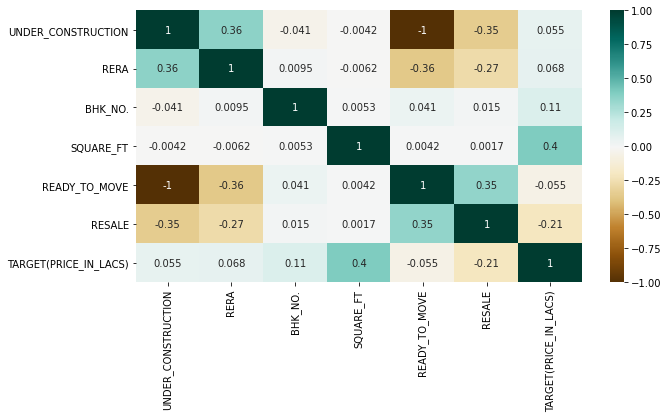

In [9]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

In [10]:
df=df.drop('READY_TO_MOVE',axis=1)


### ***Using LabelEncoder for BHK or RK Feature***

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['BHK_OR_RK']=le.fit_transform(df['BHK_OR_RK'])

In [12]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,RESALE,TARGET(PRICE_IN_LACS)
0,0,0,2,0,1300.236407,1,55.0
1,0,0,2,0,1275.000000,1,51.0
2,0,0,2,0,933.159722,1,43.0
3,0,1,2,0,929.921143,1,62.5
4,1,0,2,0,999.009247,1,60.5


In [13]:
df.shape

(29451, 7)

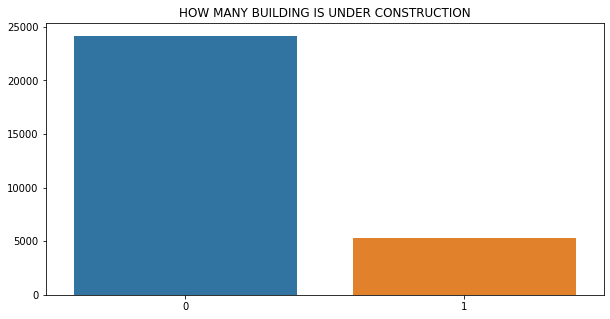

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['UNDER_CONSTRUCTION'].value_counts().index,y=df['UNDER_CONSTRUCTION'].value_counts().values)
plt.title('HOW MANY BUILDING IS UNDER CONSTRUCTION')
plt.show()

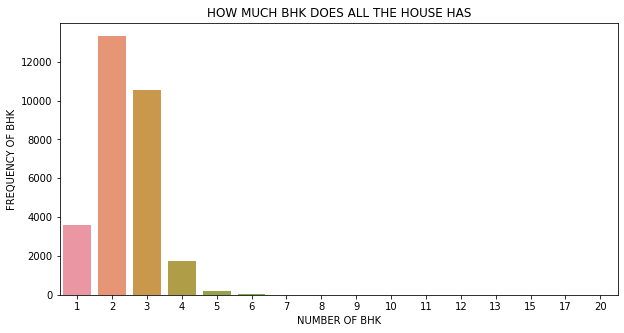

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['BHK_NO.'].value_counts().index,y=df['BHK_NO.'].value_counts().values)
plt.title('HOW MUCH BHK DOES ALL THE HOUSE HAS')
plt.xlabel('NUMBER OF BHK')
plt.ylabel('FREQUENCY OF BHK')
plt.show()

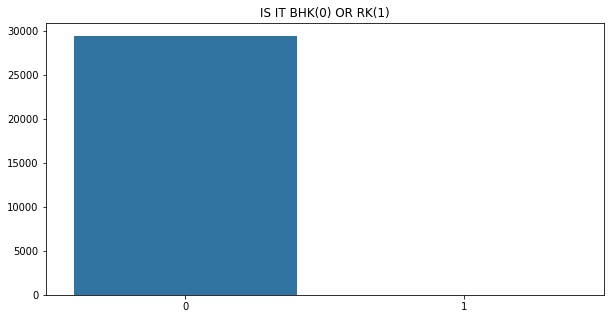

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['BHK_OR_RK'].value_counts().index,y=df['BHK_OR_RK'].value_counts().values)
plt.title('IS IT BHK(0) OR RK(1)')
plt.show()

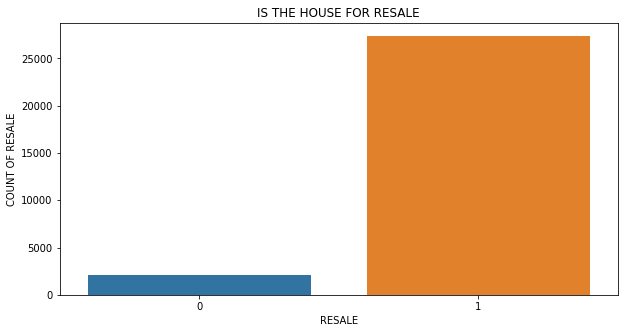

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['RESALE'].value_counts().index,y=df['RESALE'].value_counts().values)
plt.title('IS THE HOUSE FOR RESALE')
plt.xlabel('RESALE')
plt.ylabel('COUNT OF RESALE')
plt.show()

## ***Observation***

### ***- Square feet of the house in most correlated to the price of the house.***
### ***- Most of the house are Under Construction which will let the buyer design the house in their own way.***
### ***- There is 2 to 3 BHK house in large number.***
### ***- The property type of the house for all is BHK only.***
### ***-  There are only few house which are being reselled.**

# ***Thank You!!***